In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)
import time

In [2]:
L = 1
N = 40 # the length
dx = 1/N

A

In [3]:
def matrix(N,K,L, circle = False):
    dx = L/N
    matrix = np.zeros((N*K,N*K))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= N:
            row[i-N] = 1
        if i < (N-1)*K:
            row[i+N] = 1
        if (i+1)%K !=1:
            row[i-1] = 1
        if (i+1)%K !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    if circle == True:
        dist_list = []
        for n in range(N):
            a = (n+0.5) * dx - (L/2)
            for k in range(K):
                b = (k+0.5) * dx - (L/2)
                dist = np.sqrt(a**2 + b**2)
                dist_list = np.append(dist_list, dist)
        change_list = dist_list > (L/2)
        for i in range(len(change_list)):
            if change_list[i]:
                matrix[:, i] = 0
                matrix[i, :] = 0
        dist_list = np.array([])
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix

B) Square

In [4]:
M_squ = matrix(N,N,L)
eigen, vector = linalg.eigh(M_squ)

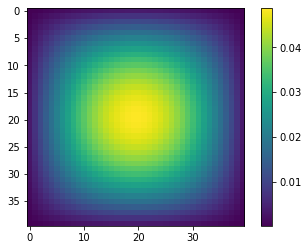

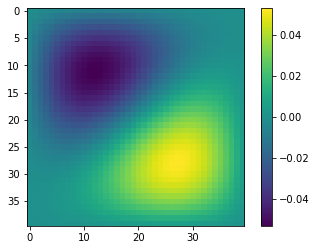

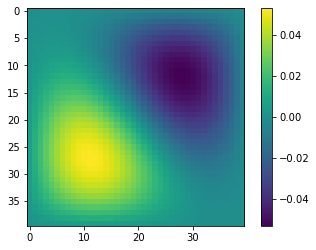

In [5]:
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()


B) Rectangle

In [6]:
M_rec = matrix(N,2*N,L)
eigen, vector = linalg.eigh(M_rec)

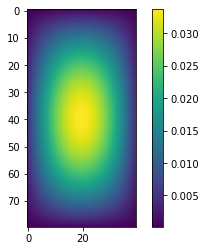

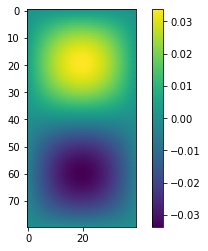

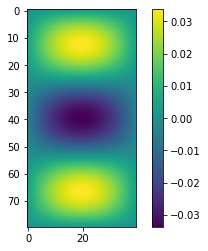

In [7]:
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N*2,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (2*N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (2*N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()


B) Circle

In [8]:
M_cir = matrix(N,N,L, True)
eigen, vector = linalg.eigh(M_cir)

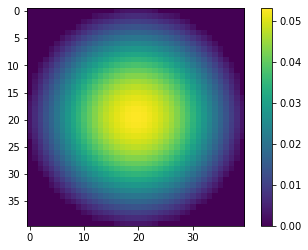

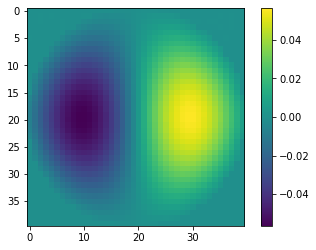

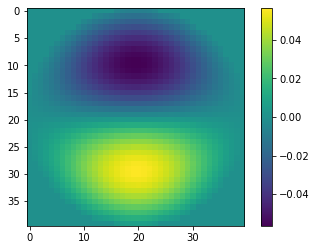

In [9]:
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

eigen[smallest] = 100
smallest = np.argmin(np.abs(eigen))
smallest_vector = vector[:,smallest]
eigen_grid = np.reshape(smallest_vector, (N,N))
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()


C)

In [10]:
start_time = time.time()
eigen_vectors = linalg.eig(M_rec)
print("%s seconds, Rectangular Matrix" % (time.time() - start_time))

44.34039926528931 seconds, Rectangular Matrix


In [11]:
start_time = time.time()
eigen_vectors = eigs(M_rec)
print("%s seconds, Sparse Rectangular Matrix" % (time.time() - start_time))

4.254144668579102 seconds, Sparse Rectangular Matrix


In [12]:
start_time = time.time()
eigen_vectors = linalg.eig(M_squ)
print("%s seconds, Square Matrix" % (time.time() - start_time))

5.681595802307129 seconds, Square Matrix


In [13]:
start_time = time.time()
eigen_vectors = eigs(M_squ)
print("%s seconds, Sparse Square Matrix" % (time.time() - start_time))

0.8798630237579346 seconds, Sparse Square Matrix


In [14]:
start_time = time.time()
eigen_vectors = linalg.eig(M_cir)
print("%s seconds, Circular Matrix" % (time.time() - start_time))

4.421377182006836 seconds, Circular Matrix


In [15]:
start_time = time.time()
eigen_vectors = eigs(M_cir)
print("%s seconds, Sparse Circular Matrix" % (time.time() - start_time))

0.5412285327911377 seconds, Sparse Circular Matrix


D)

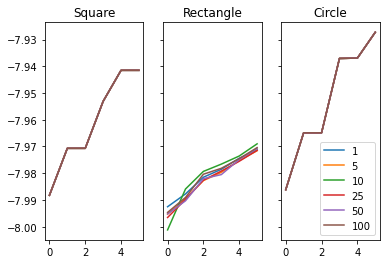

In [16]:
L_list = [1,5,10,25,50,100]

# eigen_lists_s = []
# eigen_lists_r = []
# eigen_lists_c = []

f, (squ, rec, cir) = plt.subplots(1, 3, sharey=True)
squ.set_title('Square')
rec.set_title('Rectangle')
cir.set_title('Circle')

for L in L_list:
    M_s = matrix(N,N,L)
    eigen_s, vector = eigsh(M_s)
#     eigen_lists_s.append(eigen_s)
    squ.plot(eigen_s, label = L)
    
    M_r = matrix(N,2*N,L)
    eigen_r, vector = eigsh(M_r)
#     eigen_lists_r.append(eigen_r)
    rec.plot(eigen_r, label = L)
    
    M_c = matrix(N,N,L, True)
    eigen_c, vector = eigsh(M_c)
#     eigen_lists_c.append(eigen_c)
    cir.plot(eigen_c, label = L)
    
plt.legend()    
plt.show()

E)

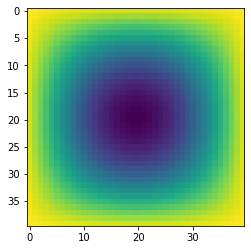

In [57]:
eigen, vector = linalg.eigh(M_squ)
l = np.min(abs(eigen))
v = vector[:,np.argmin(abs(eigen))]
v = np.reshape(v, (N,N))
plt.imshow(v)

In [51]:
def T(t):
    return np.cos(l*t) + np.sin(l*t)

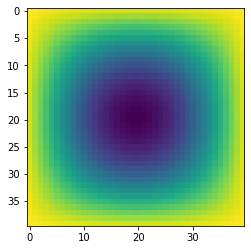

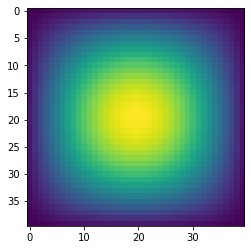

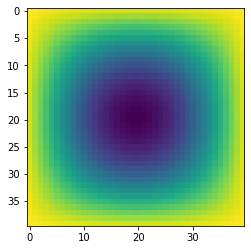

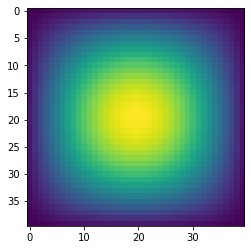

In [59]:
for i in range(1000):
    u = v * T(i)
    if i%250 == 0:
        plt.imshow(u)
        plt.show()